# Housing Prices Predictive modeling


# **Introduction**
### **Objective:** 
The goal is to develop advanced regression models for house price prediction..


### **Table of Contents:**
1. Import Libraries
2. Load Datasets
3. EDA & Visualization
4. Null Values
5. Feature Engineering
6. Model Development

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew, norm
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#### 2. Load Datasets

In [2]:
#Data_train
df_train = pd.read_csv('trainh.csv')
#Data_test
df_test = pd.read_csv('testh.csv')

In [3]:
pd.set_option('display.max_columns', 500)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Some of the types are not true we need to fix it.
df_train = df_train.astype({"MSSubClass": "object", "OverallQual": "object", "OverallCond": "object"})
df_test = df_test.astype({"MSSubClass": "object", "OverallQual": "object", "OverallCond": "object"})

#### 3. EDA & Visualization

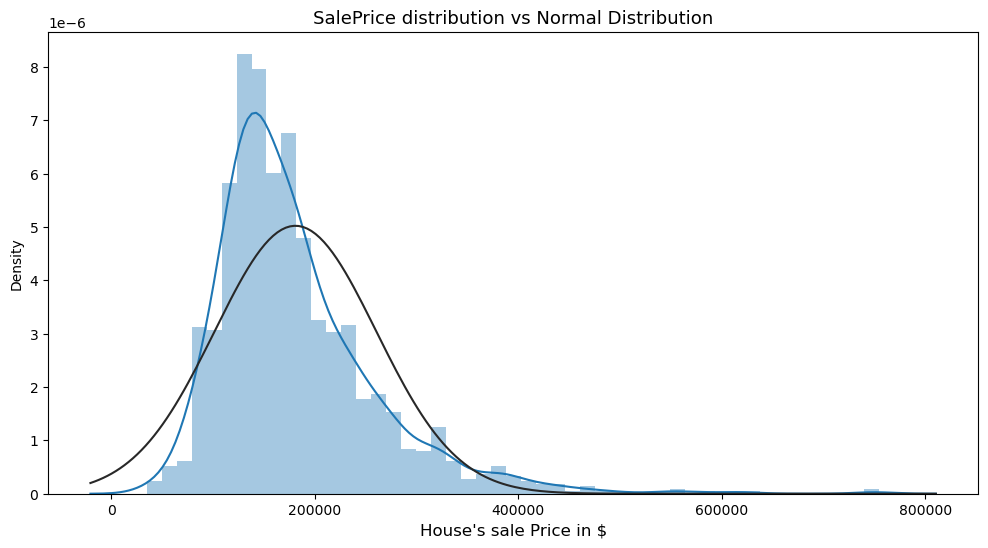

In [6]:
plt.figure(figsize = (12,6))
sns.distplot(df_train['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.show()

In [7]:
print("Skewness: %f" % abs(df_train['SalePrice']).skew())
print("Kurtosis: %f" % abs(df_train['SalePrice']).kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
# Selecting the columns with integer or float type.
num_cols = df_train.select_dtypes(include = ['number']).columns.tolist()
num_cols.remove("SalePrice")
num_cols.remove("Id")

cat_cols = df_train.select_dtypes(exclude = ['number']).columns.tolist()

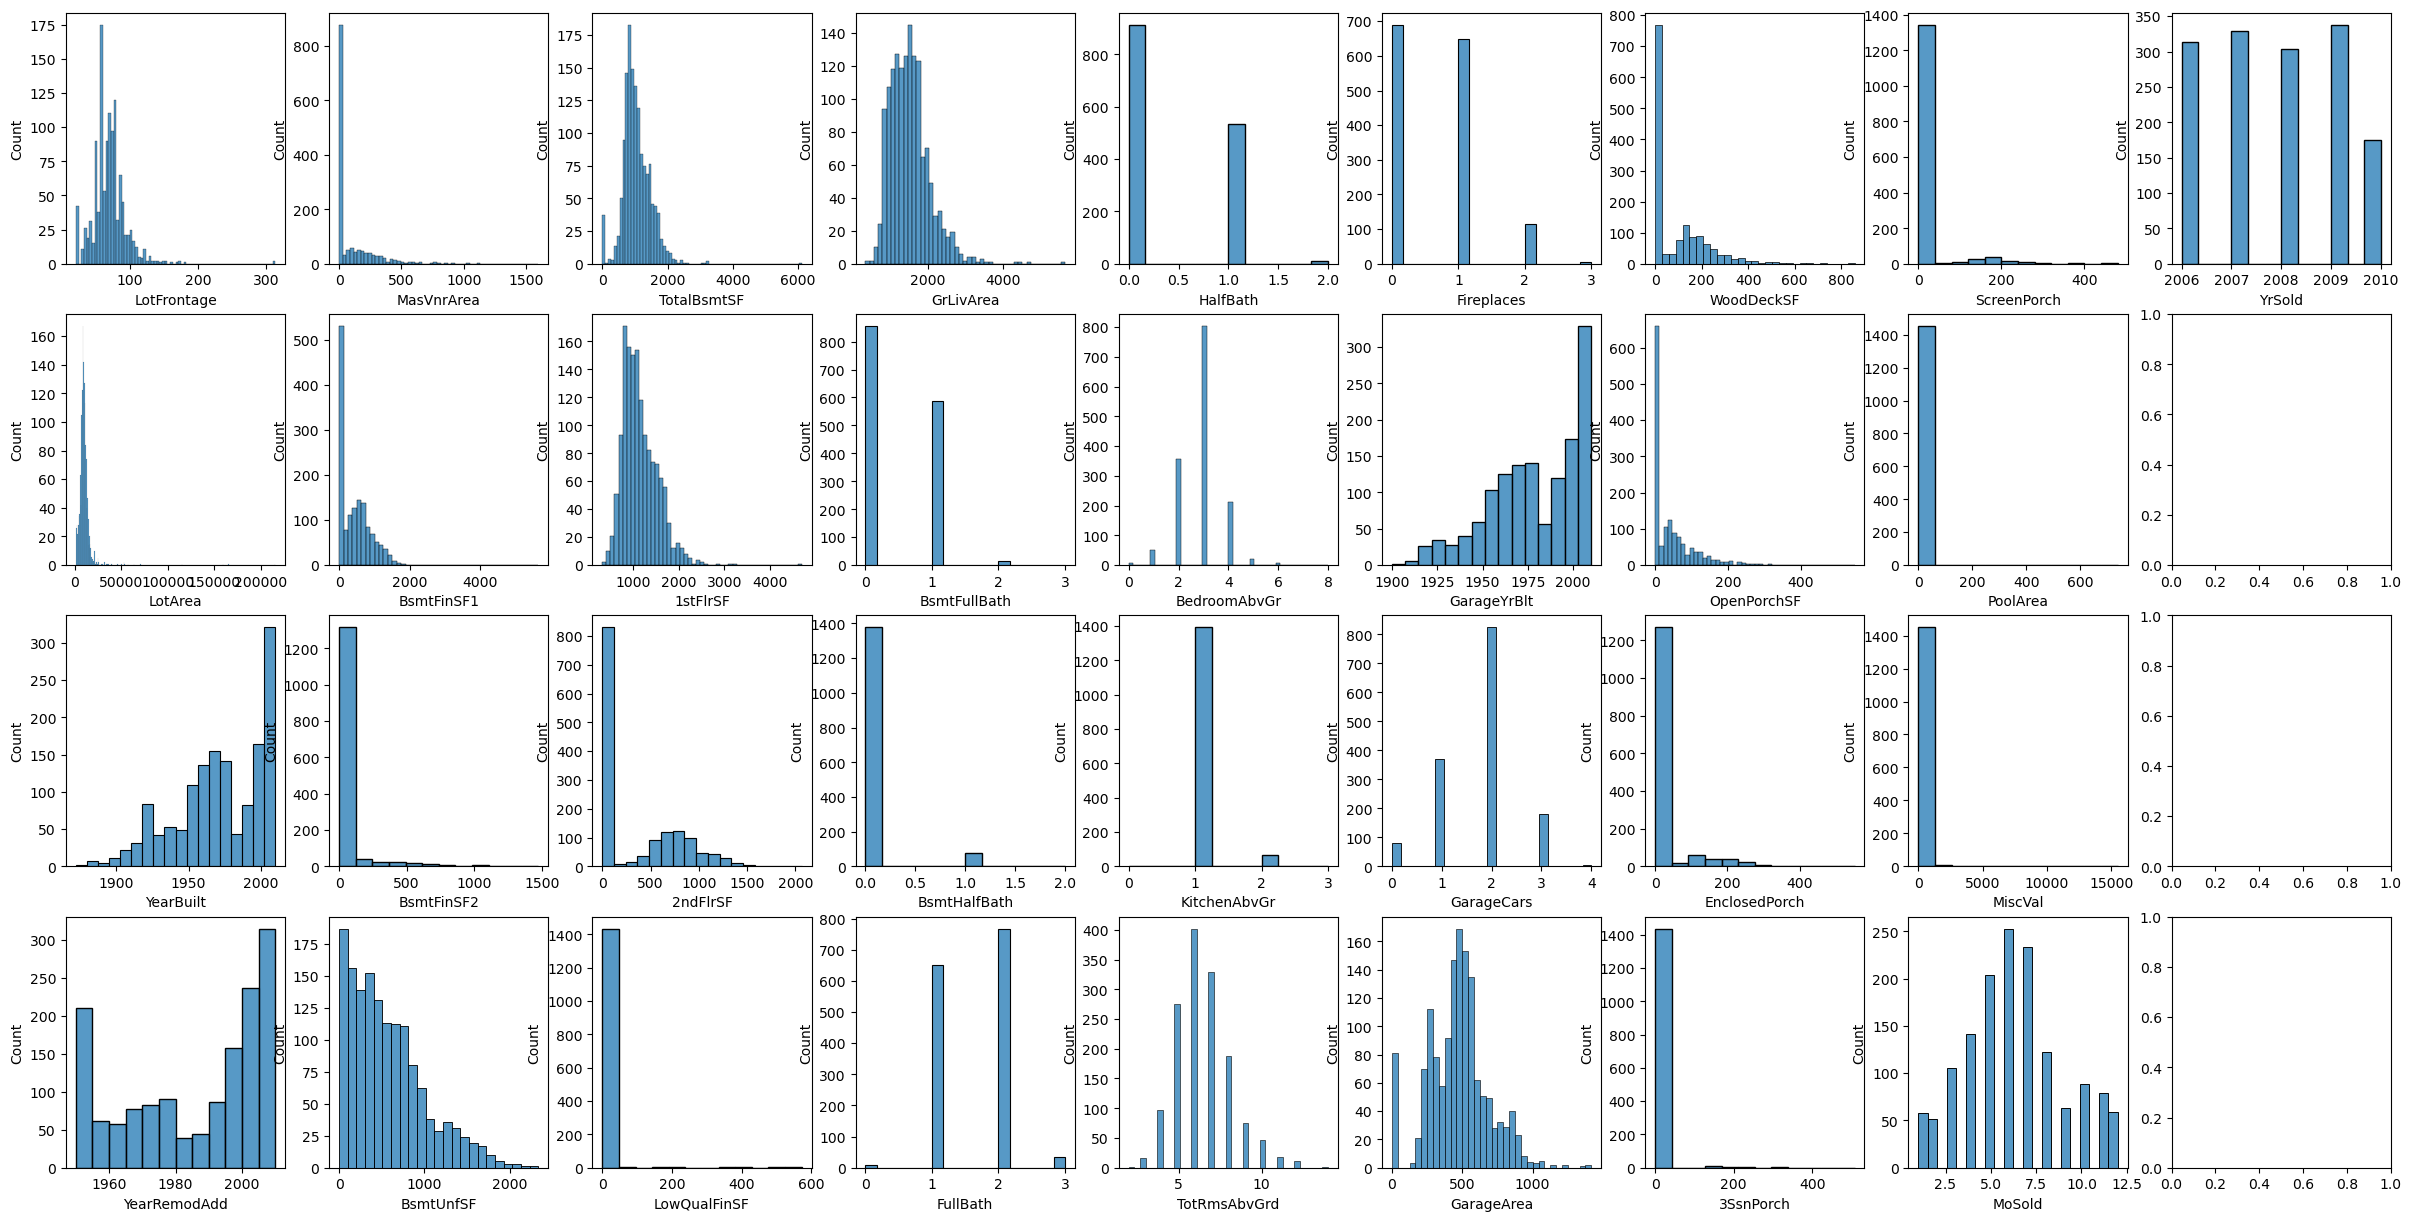

In [10]:
# Visaulization for numerical values
f, axes = plt.subplots(4, 9, figsize=(30, 15), sharex=False)
for i, col in enumerate(num_cols):
    sns.histplot(data = df_train, x = col, ax = axes[i%4, i//4])

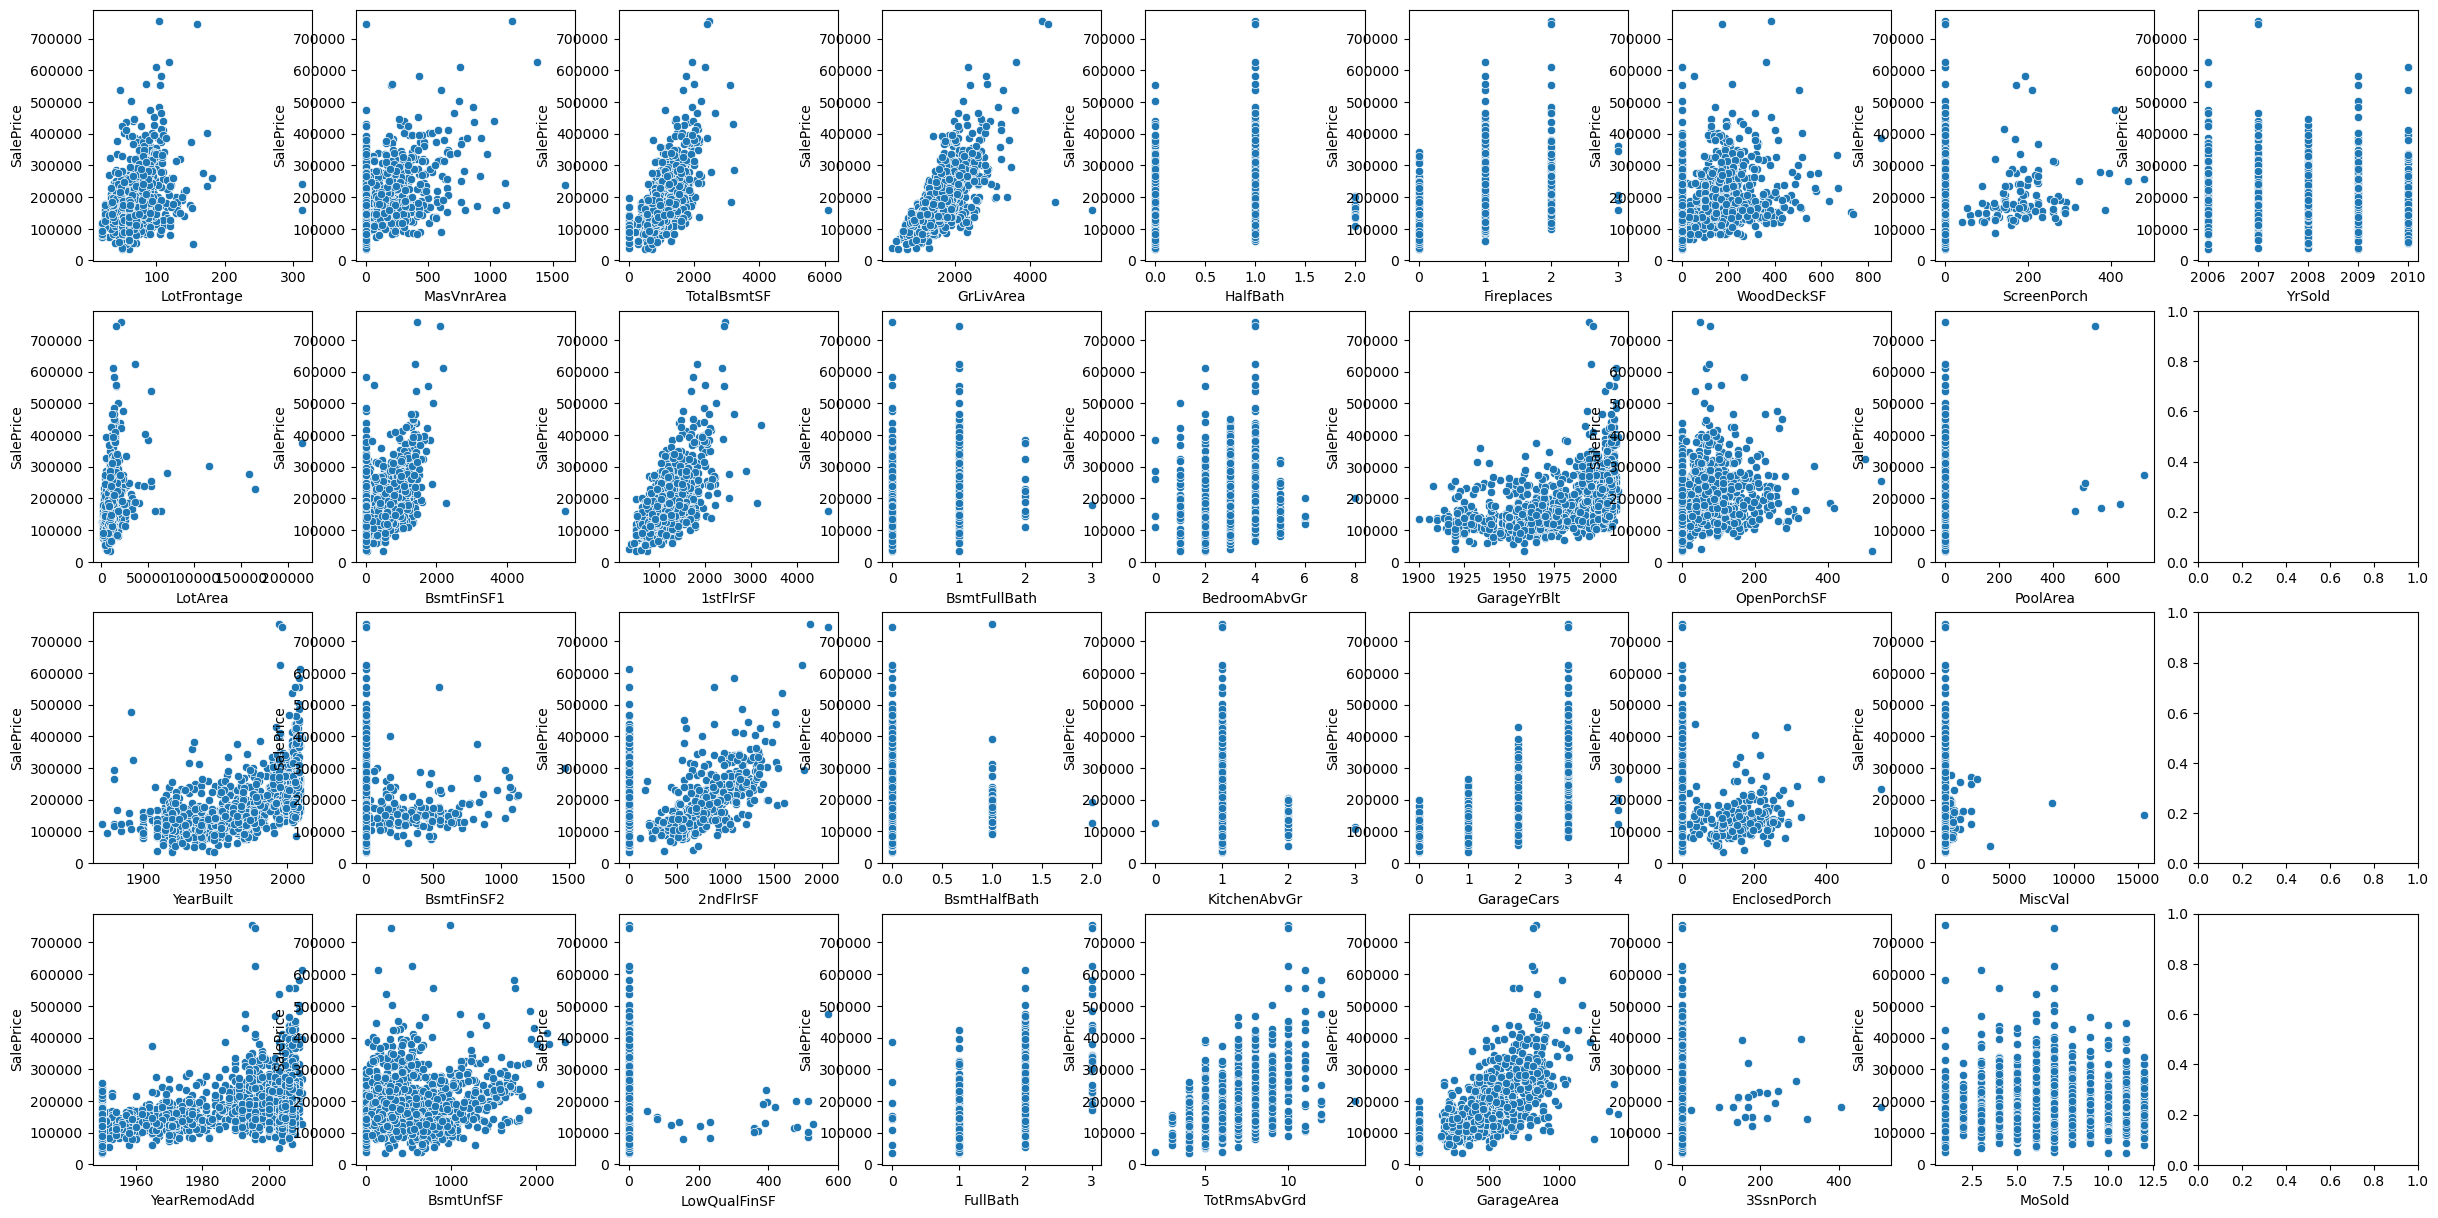

In [12]:
# Correlation between target and numerical values
f, axes = plt.subplots(4, 9, figsize=(30, 15), sharex=False)
for i, col in enumerate(num_cols):
    sns.scatterplot(data = df_train, x=col, y = "SalePrice", ax = axes[i%4, i//4])

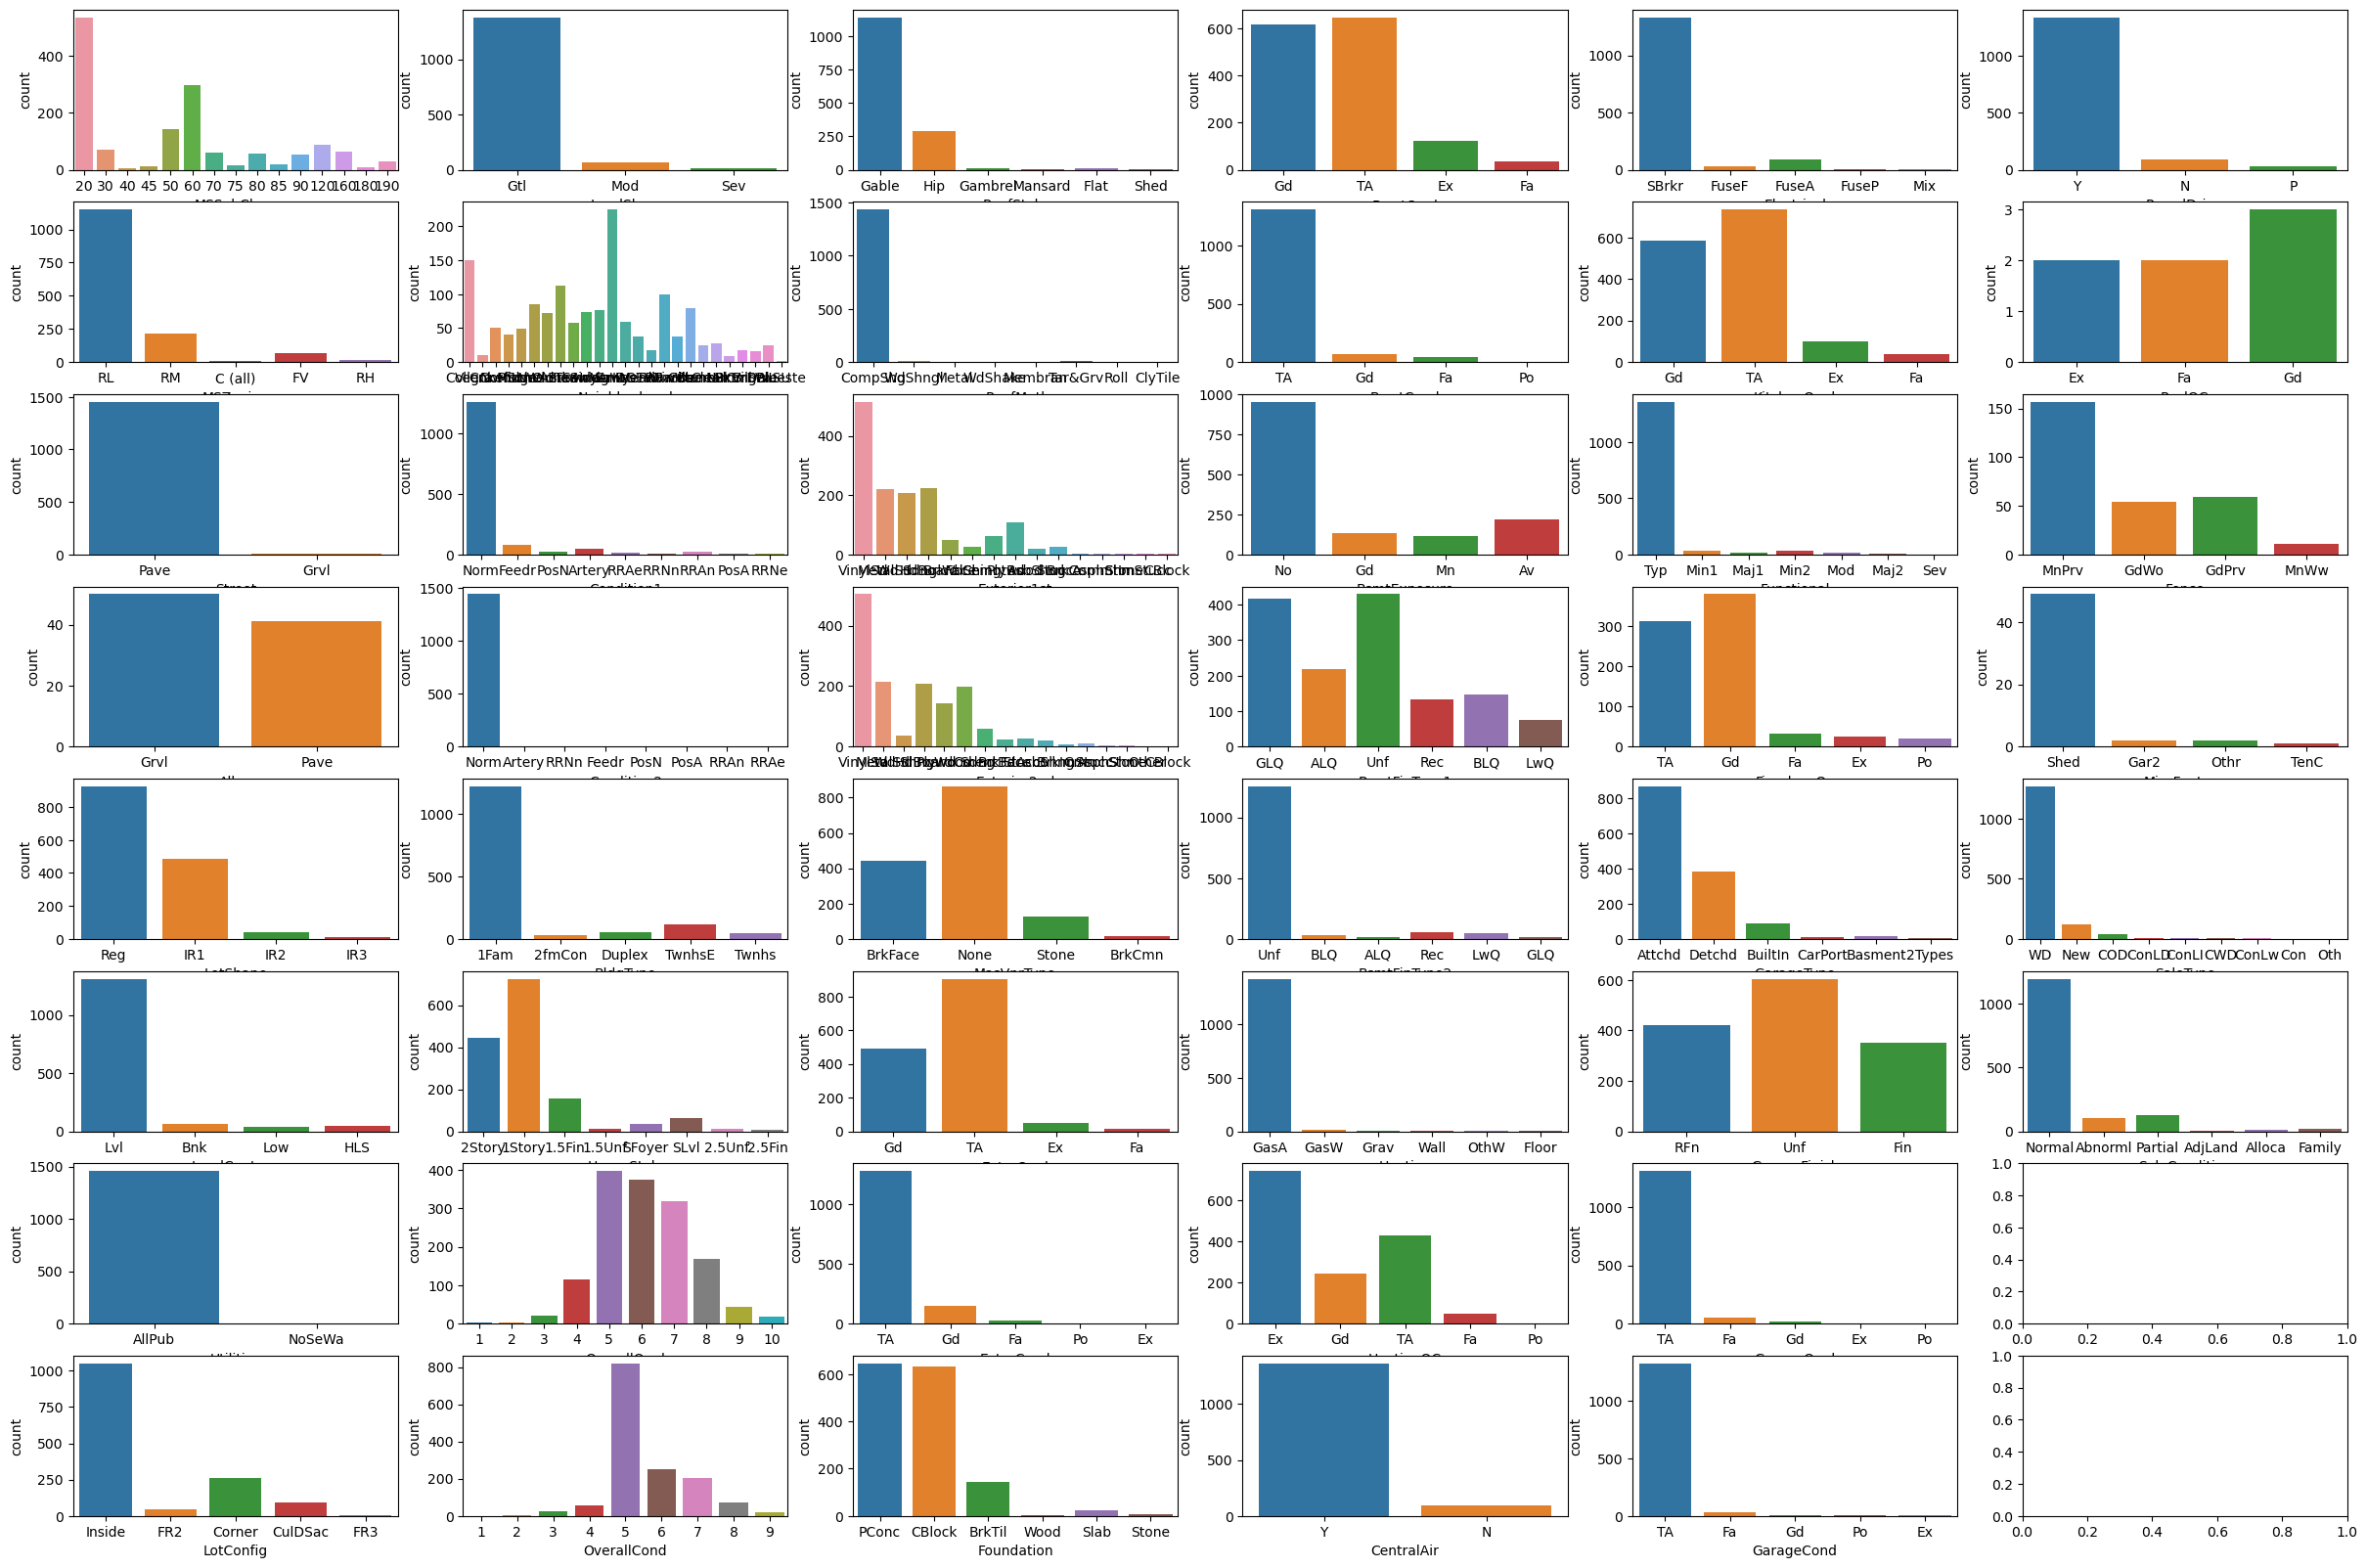

In [13]:
# Visaulization for categorical values
f, axes = plt.subplots(8, 6, figsize=(30, 20), sharex=False)
for i, col in enumerate(cat_cols):
    sns.countplot(data = df_train, x = col, ax = axes[i%8, i//8])

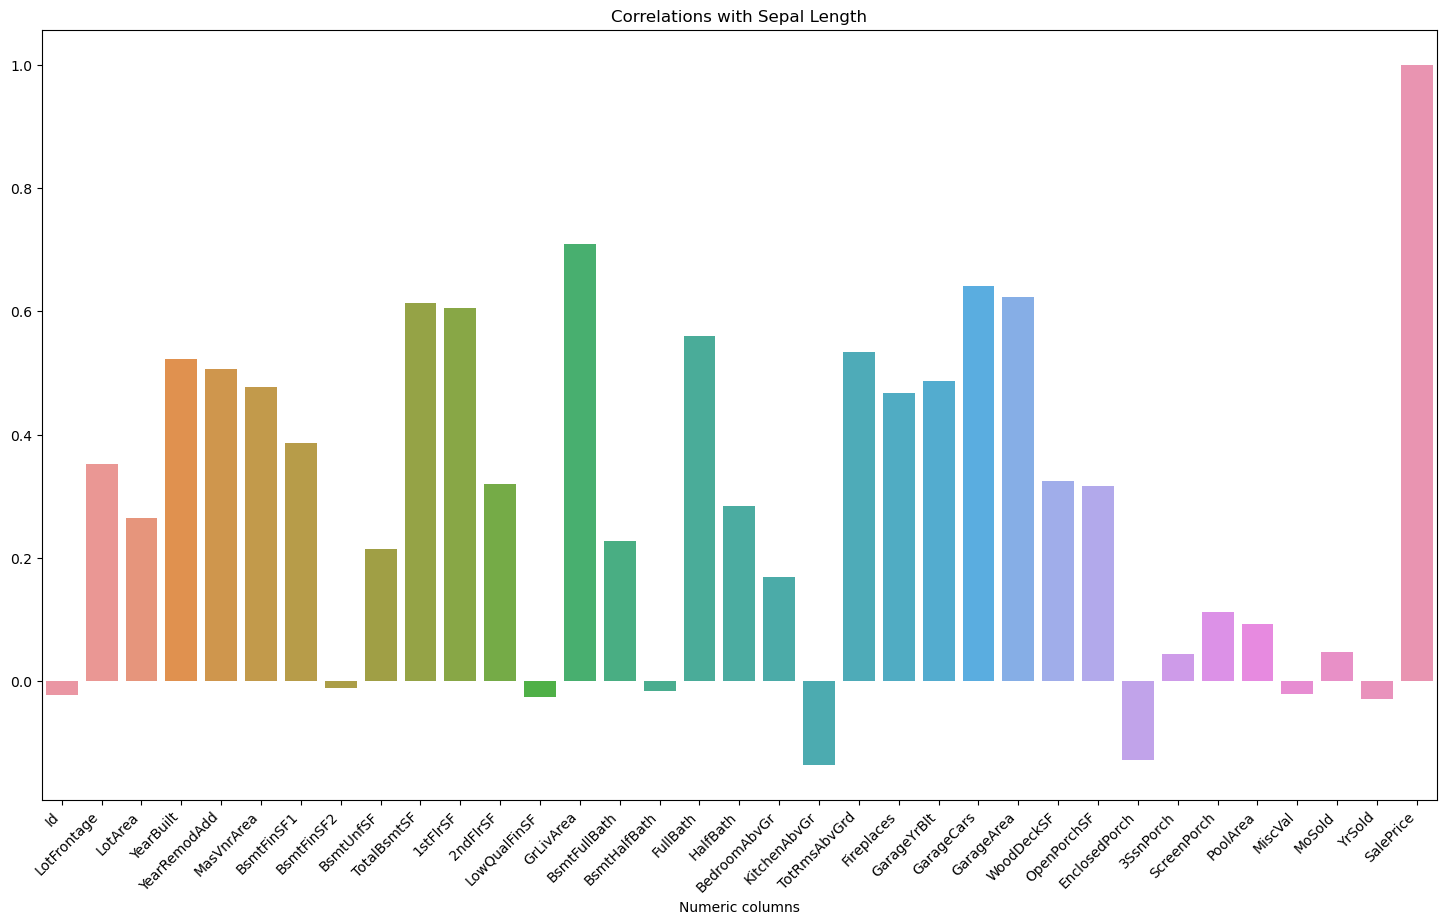

In [14]:
plt.figure(figsize=(18, 10))
corr_with_sepal_length = df_train.corrwith(df_train['SalePrice'])
sns.barplot(x = corr_with_sepal_length.index, y = corr_with_sepal_length.values)

plt.title("Correlations with Sepal Length")
plt.xlabel("Numeric columns")
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4. Null Values

In [15]:
# Dropping unnecessary columns.
df_train = df_train.drop(["Id"], axis = 1)
df_test = df_test.drop(["Id"], axis = 1)

In [16]:
# Checking the number of nan values.
pd.set_option('display.max_rows', 500)
training_null = pd.isnull(df_train).sum()
testing_null = pd.isnull(df_test).sum()
null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

,Training,Testing
MSSubClass,0,0.0
MSZoning,0,4.0
LotFrontage,259,227.0
LotArea,0,0.0
Street,0,0.0
Alley,1369,1352.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,2.0
LotConfig,0,0.0


In [17]:
# According to data description some of the nan values are MNAR.
null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", 
                     "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
# Replacing every Nan value with "None"
df_train[null_with_meaning] = df_train[null_with_meaning].fillna("None")
df_test[null_with_meaning] = df_test[null_with_meaning].fillna("None")

<AxesSubplot:>

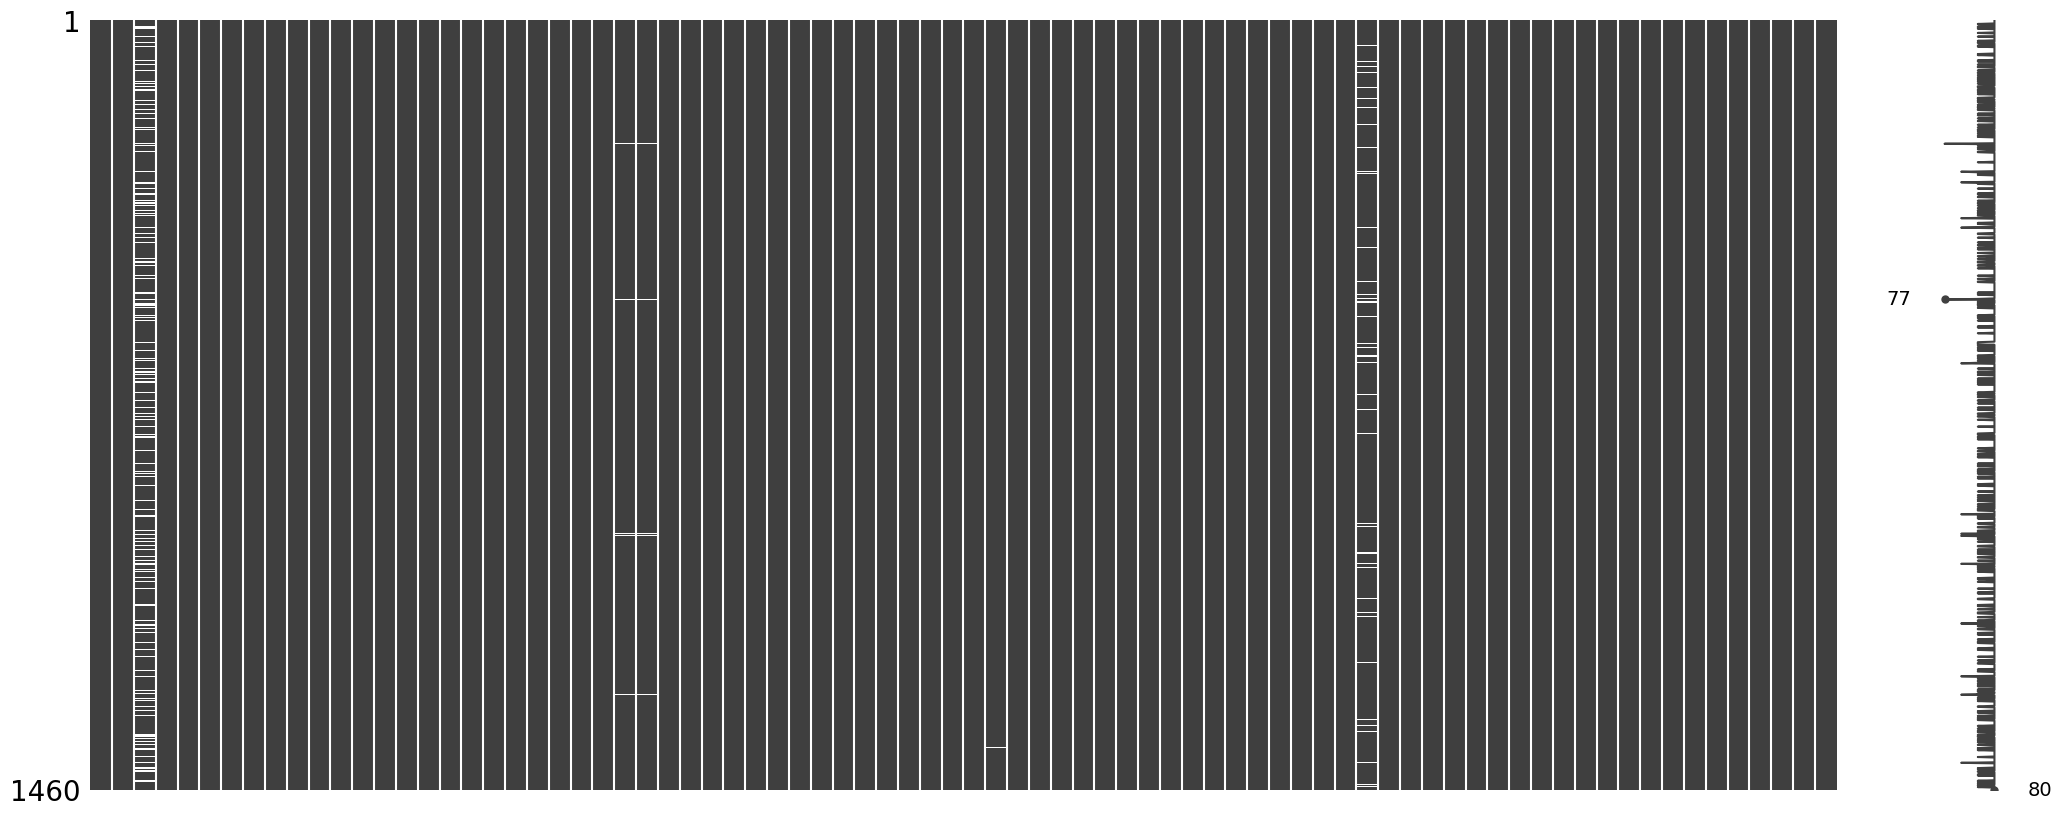

In [18]:
msno.matrix(df_train)

In [19]:
null

,Training,Testing
MSSubClass,0,0.0
MSZoning,0,4.0
LotFrontage,259,227.0
LotArea,0,0.0
Street,0,0.0
Alley,1369,1352.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,2.0
LotConfig,0,0.0


In [20]:
# Predicting the missing numeric nan values with KNNImputer.
imputer = KNNImputer(n_neighbors = 2)
df_train[num_cols] = imputer.fit_transform(df_train[num_cols])

In [21]:
df_test[num_cols] = imputer.transform(df_test[num_cols])

In [22]:
# Filling the categorical nan values with most frequent ones.
imputer = SimpleImputer(strategy='most_frequent')
df_train[cat_cols] = imputer.fit_transform(df_train[cat_cols])

In [23]:
df_test[cat_cols] = imputer.transform(df_test[cat_cols])

In [24]:
#df_test.isna().sum()
#df_train.isna().sum()

#### 5. Feature Engineering

In [25]:
df_train_add = df_train.copy()

df_train_add['TotalSF']=df_train_add['TotalBsmtSF'] + df_train_add['1stFlrSF'] + df_train_add['2ndFlrSF']

df_train_add['Total_Bathrooms'] = (df_train_add['FullBath'] + (0.5 * df_train_add['HalfBath']) +
                               df_train_add['BsmtFullBath'] + (0.5 * df_train_add['BsmtHalfBath']))

df_train_add['Total_porch_sf'] = (df_train_add['OpenPorchSF'] + df_train_add['3SsnPorch'] +
                              df_train_add['EnclosedPorch'] + df_train_add['ScreenPorch'] +
                              df_train_add['WoodDeckSF'])

df_test_add = df_test.copy()

df_test_add['TotalSF']=df_test_add['TotalBsmtSF'] + df_test_add['1stFlrSF'] + df_test_add['2ndFlrSF']

df_test_add['Total_Bathrooms'] = (df_test_add['FullBath'] + (0.5 * df_test_add['HalfBath']) +
                               df_test_add['BsmtFullBath'] + (0.5 * df_test_add['BsmtHalfBath']))

df_test_add['Total_porch_sf'] = (df_test_add['OpenPorchSF'] + df_test_add['3SsnPorch'] +
                              df_test_add['EnclosedPorch'] + df_test_add['ScreenPorch'] +
                              df_test_add['WoodDeckSF'])

In [26]:
df_train_add["SalePrice"] = np.log(df_train_add["SalePrice"])
df_train_add.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Total_Bathrooms,Total_porch_sf
0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,12.247694,2566.0,3.5,61.0
1,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,12.109011,2524.0,2.5,298.0
2,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,12.317167,2706.0,3.5,42.0
3,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,11.849398,2473.0,2.0,307.0
4,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,12.429216,3343.0,3.5,276.0


In [27]:
skewed_cols = []
for col in num_cols:
    if df_train_add[col].skew() > 0.5:
        skewed_cols.append(col)
skewed_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [28]:
df_train_add[num_cols] = np.log1p(df_train_add[num_cols])
df_test_add[num_cols] = np.log1p(df_test_add[num_cols])

In [29]:
df_train_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   object 
 1   MSZoning         1460 non-null   object 
 2   LotFrontage      1460 non-null   float64
 3   LotArea          1460 non-null   float64
 4   Street           1460 non-null   object 
 5   Alley            1460 non-null   object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   Utilities        1460 non-null   object 
 9   LotConfig        1460 non-null   object 
 10  LandSlope        1460 non-null   object 
 11  Neighborhood     1460 non-null   object 
 12  Condition1       1460 non-null   object 
 13  Condition2       1460 non-null   object 
 14  BldgType         1460 non-null   object 
 15  HouseStyle       1460 non-null   object 
 16  OverallQual      1460 non-null   object 
 17  OverallCond   

In [30]:
import category_encoders as ce

target_encoder = ce.TargetEncoder(cols = (cat_cols))
y_train = df_train_add["SalePrice"]
X_train = df_train_add.drop("SalePrice", axis = 1)

In [31]:
target_encoder.fit(X_train, y_train)

TargetEncoder(cols=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                    'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                    'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                    'Heating', ...])

In [32]:
X_train_encoded = target_encoder.transform(X_train)
X_test_encoded = target_encoder.transform(df_test_add)

In [33]:
X_train = X_train_encoded.copy()
X_test = X_test_encoded.copy()
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Total_Bathrooms,Total_porch_sf
0,12.339975,12.085885,4.189655,9.042040,12.025522,12.037675,11.936094,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,12.221773,12.144178,7.602900,7.602900,11.9842,12.019216,12.205873,12.209631,12.163630,5.283204,12.311282,12.043078,12.261665,12.179882,12.042615,11.955653,12.301937,6.561031,12.043738,0.0,5.017280,6.753438,12.032078,12.207626,12.06109,12.06144,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,12.222337,2.197225,12.038511,0.000000,11.808907,12.160778,7.602900,12.172672,1.098612,6.308098,12.068539,12.070483,12.059895,0.000000,4.127134,0.000000,0.0,0.0,0.0,12.022115,12.058599,12.030112,0.0,1.098612,7.605392,11.991061,12.005034,2566.0,3.5,61.0
1,12.052788,12.085885,4.394449,9.169623,12.025522,12.037675,11.936094,12.022694,12.024183,12.034068,12.020565,12.116583,11.818794,12.025895,12.047512,11.993683,11.967308,11.910020,7.589336,7.589336,11.9842,12.019216,11.859767,11.862286,11.896884,0.000000,11.837985,12.043078,11.870080,12.179882,12.042615,12.364355,11.953313,6.886532,12.043738,0.0,5.652489,7.141245,12.032078,12.207626,12.06109,12.06144,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,11.810592,1.945910,12.038511,0.693147,12.186416,12.160778,7.589336,12.172672,1.098612,6.133398,12.068539,12.070483,12.059895,5.700444,0.000000,0.000000,0.0,0.0,0.0,12.022115,12.058599,12.030112,0.0,1.791759,7.604894,11.991061,12.005034,2524.0,2.5,298.0
2,12.339975,12.085885,4.234107,9.328212,12.025522,12.037675,12.163465,12.022694,12.024183,12.001900,12.020565,12.163641,12.042916,12.025895,12.047512,12.182686,12.221773,12.144178,7.601902,7.602401,11.9842,12.019216,12.205873,12.209631,12.163630,5.093750,12.311282,12.043078,12.261665,12.179882,12.042615,12.094814,12.301937,6.188264,12.043738,0.0,6.075346,6.825460,12.032078,12.207626,12.06109,12.06144,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,12.222337,1.945910,12.038511,0.693147,12.186416,12.160778,7.601902,12.172672,1.098612,6.411818,12.068539,12.070483,12.059895,0.000000,3.761200,0.000000,0.0,0.0,0.0,12.022115,12.058599,12.030112,0.0,2.302585,7.605392,11.991061,12.005034,2706.0,3.5,42.0
3,11.965124,12.085885,4.110874,9.164401,12.025522,12.037675,12.163465,12.022694,12.024183,12.027446,12.020565,12.198787,12.042916,12.025895,12.047512,12.182686,12.221773,12.144178,7.557995,7.586296,11.9842,12.019216,11.838506,11.910940,11.896884,0.000000,11.837985,12.043078,11.722529,11.810855,12.218123,11.955653,11.953313,5.379897,12.043738,0.0,6.293419,6.629363,12.032078,11.910371,12.06109,12.06144,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,12.222337,2.079442,12.038511,0.693147,12.256533,11.765643,7.600402,11.818974,1.386294,6.466145,12.068539,12.070483,12.059895,0.000000,3.583519,5.609472,0.0,0.0,0.0,12.022115,12.058599,12.030112,0.0,1.098612,7.604396,11.991061,11.788846,2473.0,2.0,307.0
4,12.339975,12.085885,4.442651,9.565284,12.025522,12.037675,12.163465,12.022694,12.024183,12.034068,12.020565,12.604875,12.042916,12.025895,12.047512,12

#### 6. Model Development

In [34]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xg

In [35]:
baseline_el = ElasticNet(random_state = 0, max_iter = 10e7, alpha = 0.0003)
baseline_score_el = cross_val_score(baseline_el, X_train, y_train)
print("ENet avg:", np.mean(baseline_score_el))

ENet avg: 0.8797281956067806


In [36]:
baseline_r = Ridge(alpha = 1, random_state = 0)
baseline_score_r = cross_val_score(baseline_r, X_train, y_train)
print("Ridge avg:", np.mean(baseline_score_r))

Ridge avg: 0.8783947711976644


In [37]:
baseline_ls = Lasso(alpha = 0.0001,random_state = 0)
baseline_score_ls = cross_val_score(baseline_ls, X_train, y_train)
print("Lasso avg:", np.mean(baseline_score_ls))

Lasso avg: 0.8795302976559445


In [38]:
baseline_kr = KernelRidge(alpha = 0.1)
baseline_score_kr = cross_val_score(baseline_kr, X_train, y_train)
print("KRR avg:", np.mean(baseline_score_kr))

KRR avg: 0.877096897003032


In [39]:
baseline_lgb = lgb.LGBMRegressor(learning_rate = 0.01, num_leaves = 4,n_estimators = 2000, random_state = 0)
baseline_score_lgb = cross_val_score(baseline_lgb, X_train, y_train)
print("LGBM avg:", np.mean(baseline_score_lgb))

LGBM avg: 0.9001808632010289


In [40]:
baseline_xg = xg.XGBRegressor(learning_rate = 0.01,n_estimators = 2000, subsample = 0.7, colsample_bytree = 0.7, 
                            random_state=0)
baseline_score_xg = cross_val_score(baseline_xg, X_train, y_train)
print("XGB avg:", np.mean(baseline_score_xg))

XGB avg: 0.9086418986440392


In [41]:
baseline_cb = CatBoostRegressor(random_state = 0, verbose = 0)
baseline_score_cb = cross_val_score(baseline_cb, X_train, y_train)
print("CatB avg:", np.mean(baseline_score_cb))

CatB avg: 0.9087136771141106


In [42]:
baseline_gbr = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.02, max_depth = 4, max_features = 'sqrt',
                                     min_samples_leaf=15, min_samples_split = 50, loss='huber', random_state = 0)
baseline_score_gbr = cross_val_score(baseline_gbr, X_train, y_train)
print("GBR avg:", np.mean(baseline_score_gbr))

GBR avg: 0.9061432265850053


In [43]:
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators = [('ElasticNet', baseline_el), ('Ridge', baseline_r), 
                                            ('Lasso', baseline_ls), ('KernelRidge', baseline_kr), 
                                            ('LGBM', baseline_lgb), ('XGB', baseline_xg),
                                            ('CatBoost', baseline_cb), ('GradientB', baseline_gbr)])

In [44]:
cv = cross_val_score(voting_reg, X_train, y_train)
print(cv)
print(cv.mean())

[0.92005386 0.90110809 0.9059195  0.91013976 0.87621504]
0.9026872483997479


In [45]:
voting_reg = voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)
print(y_pred)

[11.68203216 11.99113958 12.1113114  ... 11.99642349 11.68203204
 12.24720339]


In [46]:
y_pred_norm = np.exp(y_pred)
y_pred_norm

array([118424.64839341, 161319.08532371, 181918.01522641, ...,
       162173.73720603, 118424.63456817, 208397.66544667])

In [47]:
df_id = pd.read_csv("testh.csv")
final_data = {'Id': df_id.Id, 'SalePrice': y_pred_norm}
submission8 = pd.DataFrame(data = final_data)
submission8.to_csv("submission8.csv", index = None)

In [48]:
from mlxtend.regressor import StackingRegressor
stregr = StackingRegressor(regressors = [baseline_el, baseline_r, baseline_ls, baseline_kr, baseline_lgb, baseline_xg, 
                                         baseline_cb, baseline_gbr], meta_regressor = baseline_lgb)
cv = cross_val_score(stregr, X_train, y_train)
print(cv.mean())

0.9075996234441576


In [49]:
stregr.fit(X_train, y_train)
y_pred = stregr.predict(X_test)
y_pred

array([11.75985924, 11.99738791, 12.16225159, ..., 11.92429714,
       11.65731194, 12.23231596])

In [50]:
y_pred_norm = np.exp(y_pred)
y_pred_norm

array([128009.43408883, 162330.21542934, 191425.04335939, ...,
       150888.60616963, 115533.0527761 , 205318.14104867])